In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from ast import literal_eval

from scipy.stats import bootstrap
import numpy as np

In [2]:
party_shifts_df = pd.read_csv(
    '../out_files/semantic_shifts_party_embeddings_per_period_merged_compass_50iterations.csv',
    converters={'period_pair': literal_eval})
party_shifts_df

,iteration,period_pair,word,semantic_similarity,common_voc_size,neighbors_t1,neighbors_t2
0,0,"(12, 13)",@συνασπισμος,0.852301,80563,"[('@συριζα', 0.7692288160324097), ('αριστερας'...","[('αριστερας', 0.747949481010437), ('ριζοσπαστ..."
1,0,"(15, 17)",@δημαρ,0.500367,88563,"[('@sw@δημαρ', 0.626854419708252), ('@κκε', 0....","[('δημαρ', 0.9519767165184021), ('οδυσσεα', 0...."
2,0,"(15, 17)",@κκε,0.926764,88563,"[('@δημαρ', 0.6201146841049194), ('@χα', 0.529...","[('@χα', 0.5424186587333679), ('@ποταμι', 0.51..."
3,0,"(12, 13)",@sw΄οψιν,0.789870,80563,"[('@sw’οψιν', 0.9064780473709106), ('οψιν', 0....","[('@sw’οψιν', 0.8102238774299622), ('οψιν', 0...."
4,0,"(11, 12)",μ΄@sw,0.505457,80924,"[('ανατολιτικο', 0.6135776042938232), ('κτιζαμ...","[('τελεσιδικο', 0.6178101897239685), ('ξοφλησα..."
...,...,...,...,...,...,...,...
13745,49,"(15, 17)",@συριζα,0.881856,88563,"[('@νδ', 0.5719690322875977), ('αντιπολιτευσης...","[('@νδ', 0.5631855726242065), ('@πασοκ', 0.459..."
13746,49,"(13, 15)",@νδ,0.885973,83188,"[('@πασοκ', 0.5925945043563843), ('αντιπολιτευ...","[('@sw@δημαρ', 0.6397783756256104), ('@πασοκ',..."
13747,49,"(11, 12)",β΄@sw,0.888412,80924,"[('οζαλ', 0.9397397041320801), ('6366', 0.9396...","[('καταπολεμησεως', 0.9366881847381592), ('σπε..."
13748,49,"(17, 18)",‘@sw,0.327772,75644,"[('΄89', 0.4891178011894226), ('παρελθουν', 0....","[('εξωσυμβατικα', 0.6369427442550659), ('ξεπαγ..."


In [3]:
def confidence_intervals(data):
    res = bootstrap((data,), np.mean, confidence_level=0.95)
    return (res.confidence_interval.low, res.confidence_interval.high)

In [4]:
average_similarity_df = party_shifts_df[['period_pair', 'word', 'semantic_similarity']].\
    groupby(['period_pair', 'word']).agg(['mean', confidence_intervals]).reset_index()
average_similarity_df.sort_values(by='period_pair', inplace=True)
average_similarity_df

period_pair             word semantic_similarity  \
                                                mean   
0        (7, 8)              @sw            0.980648   
1        (7, 8)  @sw@συνασπισμος            0.683303   
2        (7, 8)             @sw’            0.954732   
3        (7, 8)           @δηανα            0.237322   
4        (7, 8)             @κκε            0.851225   
..          ...              ...                 ...   
250    (17, 18)             @sw”            0.549018   
251    (17, 18)            @ανελ            0.638831   
252    (17, 18)           @δημαρ            0.259264   
254    (17, 18)        @ελληνικη            0.688132   
274    (17, 18)            “@sw”            0.504148   

                                                 
                           confidence_intervals  
0      (0.9801578755045404, 0.9811246135092304)  
1      (0.6649579151628844, 0.7003220240085909)  
2      (0.9539286417161787, 0.9556697646288996)  
3     (0.22683947804972474, 0.2473573830197904)  
4       (0.849262138941912, 0.8532826147289609)  
..                                          ...  
250    (0.5363755190751726, 0.5610035680864522)  
251    (0.6355609947446528, 0.6419277366448767)  
252  (0.25106501739755765, 0.26654325391832934)  
254    (0.6847263213934945, 0.6911853827983326)  
274    (0.4880857598491363, 0.5180334939260608)  

[275 rows x 4 columns]

In [5]:
average_similarity_df[['ci_low', 'ci_high']] = pd.DataFrame(average_similarity_df[('semantic_similarity', 'confidence_intervals')].tolist(), 
                                                            index= average_similarity_df.index)
average_similarity_df

period_pair             word semantic_similarity  \
                                                mean   
0        (7, 8)              @sw            0.980648   
1        (7, 8)  @sw@συνασπισμος            0.683303   
2        (7, 8)             @sw’            0.954732   
3        (7, 8)           @δηανα            0.237322   
4        (7, 8)             @κκε            0.851225   
..          ...              ...                 ...   
250    (17, 18)             @sw”            0.549018   
251    (17, 18)            @ανελ            0.638831   
252    (17, 18)           @δημαρ            0.259264   
254    (17, 18)        @ελληνικη            0.688132   
274    (17, 18)            “@sw”            0.504148   

                                                   ci_low   ci_high  
                           confidence_intervals                      
0      (0.9801578755045404, 0.9811246135092304)  0.980158  0.981125  
1      (0.6649579151628844, 0.7003220240085909)  0.664958  0.700322  
2      (0.9539286417161787, 0.9556697646288996)  0.953929  0.955670  
3     (0.22683947804972474, 0.2473573830197904)  0.226839  0.247357  
4       (0.849262138941912, 0.8532826147289609)  0.849262  0.853283  
..                                          ...       ...       ...  
250    (0.5363755190751726, 0.5610035680864522)  0.536376  0.561004  
251    (0.6355609947446528, 0.6419277366448767)  0.635561  0.641928  
252  (0.25106501739755765, 0.26654325391832934)  0.251065  0.266543  
254    (0.6847263213934945, 0.6911853827983326)  0.684726  0.691185  
274    (0.4880857598491363, 0.5180334939260608)  0.488086  0.518033  

[275 rows x 6 columns]

In [6]:
average_similarity_df['yerr_low'] = (average_similarity_df[('semantic_similarity', 'mean')] 
                                     - average_similarity_df['ci_low'])
average_similarity_df['yerr_high'] = (average_similarity_df['ci_high'] 
                                      - average_similarity_df[('semantic_similarity', 'mean')])
average_similarity_df

period_pair             word semantic_similarity  \
                                                mean   
0        (7, 8)              @sw            0.980648   
1        (7, 8)  @sw@συνασπισμος            0.683303   
2        (7, 8)             @sw’            0.954732   
3        (7, 8)           @δηανα            0.237322   
4        (7, 8)             @κκε            0.851225   
..          ...              ...                 ...   
250    (17, 18)             @sw”            0.549018   
251    (17, 18)            @ανελ            0.638831   
252    (17, 18)           @δημαρ            0.259264   
254    (17, 18)        @ελληνικη            0.688132   
274    (17, 18)            “@sw”            0.504148   

                                                   ci_low   ci_high  yerr_low  \
                           confidence_intervals                                 
0      (0.9801578755045404, 0.9811246135092304)  0.980158  0.981125  0.000490   
1      (0.6649579151628844, 0.7003220240085909)  0.664958  0.700322  0.018345   
2      (0.9539286417161787, 0.9556697646288996)  0.953929  0.955670  0.000803   
3     (0.22683947804972474, 0.2473573830197904)  0.226839  0.247357  0.010483   
4       (0.849262138941912, 0.8532826147289609)  0.849262  0.853283  0.001963   
..                                          ...       ...       ...       ...   
250    (0.5363755190751726, 0.5610035680864522)  0.536376  0.561004  0.012643   
251    (0.6355609947446528, 0.6419277366448767)  0.635561  0.641928  0.003270   
252  (0.25106501739755765, 0.26654325391832934)  0.251065  0.266543  0.008199   
254    (0.6847263213934945, 0.6911853827983326)  0.684726  0.691185  0.003406   
274    (0.4880857598491363, 0.5180334939260608)  0.488086  0.518033  0.016062   

    yerr_high  
               
0    0.000477  
1    0.017019  
2    0.000938  
3    0.010035  
4    0.002057  
..        ...  
250  0.011985  
251  0.003097  
252  0.007280  
254  0.003054  
274  0.013886  

[275 rows x 8 columns]

In [7]:
periods = {
    7: (1989, 1993),
    8: (1993, 1996),
    9: (1996, 2000),
    10: (2000, 2004),
    11: (2004, 2007),
    12: (2007, 2009),
    13: (2009, 2012),
    14: (2012, 2012),
    15: (2012, 2014),
    16: (2015, 2015),
    17: (2015, 2019),
    18: (2019, 2020)
}

In [8]:
average_similarity_df['period_start'] = average_similarity_df['period_pair'].map(lambda x: periods[x[0]][0])
average_similarity_df['period_end'] = average_similarity_df['period_pair'].map(lambda x: periods[x[1]][1])
average_similarity_df

period_pair             word semantic_similarity  \
                                                mean   
0        (7, 8)              @sw            0.980648   
1        (7, 8)  @sw@συνασπισμος            0.683303   
2        (7, 8)             @sw’            0.954732   
3        (7, 8)           @δηανα            0.237322   
4        (7, 8)             @κκε            0.851225   
..          ...              ...                 ...   
250    (17, 18)             @sw”            0.549018   
251    (17, 18)            @ανελ            0.638831   
252    (17, 18)           @δημαρ            0.259264   
254    (17, 18)        @ελληνικη            0.688132   
274    (17, 18)            “@sw”            0.504148   

                                                   ci_low   ci_high  yerr_low  \
                           confidence_intervals                                 
0      (0.9801578755045404, 0.9811246135092304)  0.980158  0.981125  0.000490   
1      (0.6649579151628844, 0.7003220240085909)  0.664958  0.700322  0.018345   
2      (0.9539286417161787, 0.9556697646288996)  0.953929  0.955670  0.000803   
3     (0.22683947804972474, 0.2473573830197904)  0.226839  0.247357  0.010483   
4       (0.849262138941912, 0.8532826147289609)  0.849262  0.853283  0.001963   
..                                          ...       ...       ...       ...   
250    (0.5363755190751726, 0.5610035680864522)  0.536376  0.561004  0.012643   
251    (0.6355609947446528, 0.6419277366448767)  0.635561  0.641928  0.003270   
252  (0.25106501739755765, 0.26654325391832934)  0.251065  0.266543  0.008199   
254    (0.6847263213934945, 0.6911853827983326)  0.684726  0.691185  0.003406   
274    (0.4880857598491363, 0.5180334939260608)  0.488086  0.518033  0.016062   

    yerr_high period_start period_end  
                                       
0    0.000477         1989       1996  
1    0.017019         1989       1996  
2    0.000938         1989       1996  
3    0.010035         1989       1996  
4    0.002057         1989       1996  
..        ...          ...        ...  
250  0.011985         2015       2020  
251  0.003097         2015       2020  
252  0.007280         2015       2020  
254  0.003054         2015       2020  
274  0.013886         2015       2020  

[275 rows x 10 columns]

In [9]:
average_similarity_df['period_middle'] = ((average_similarity_df['period_start'] 
                                           + average_similarity_df['period_end']) / 2)
average_similarity_df

period_pair             word semantic_similarity  \
                                                mean   
0        (7, 8)              @sw            0.980648   
1        (7, 8)  @sw@συνασπισμος            0.683303   
2        (7, 8)             @sw’            0.954732   
3        (7, 8)           @δηανα            0.237322   
4        (7, 8)             @κκε            0.851225   
..          ...              ...                 ...   
250    (17, 18)             @sw”            0.549018   
251    (17, 18)            @ανελ            0.638831   
252    (17, 18)           @δημαρ            0.259264   
254    (17, 18)        @ελληνικη            0.688132   
274    (17, 18)            “@sw”            0.504148   

                                                   ci_low   ci_high  yerr_low  \
                           confidence_intervals                                 
0      (0.9801578755045404, 0.9811246135092304)  0.980158  0.981125  0.000490   
1      (0.6649579151628844, 0.7003220240085909)  0.664958  0.700322  0.018345   
2      (0.9539286417161787, 0.9556697646288996)  0.953929  0.955670  0.000803   
3     (0.22683947804972474, 0.2473573830197904)  0.226839  0.247357  0.010483   
4       (0.849262138941912, 0.8532826147289609)  0.849262  0.853283  0.001963   
..                                          ...       ...       ...       ...   
250    (0.5363755190751726, 0.5610035680864522)  0.536376  0.561004  0.012643   
251    (0.6355609947446528, 0.6419277366448767)  0.635561  0.641928  0.003270   
252  (0.25106501739755765, 0.26654325391832934)  0.251065  0.266543  0.008199   
254    (0.6847263213934945, 0.6911853827983326)  0.684726  0.691185  0.003406   
274    (0.4880857598491363, 0.5180334939260608)  0.488086  0.518033  0.016062   

    yerr_high period_start period_end period_middle  
                                                     
0    0.000477         1989       1996        1992.5  
1    0.017019         1989       1996        1992.5  
2    0.000938         1989       1996        1992.5  
3    0.010035         1989       1996        1992.5  
4    0.002057         1989       1996        1992.5  
..        ...          ...        ...           ...  
250  0.011985         2015       2020        2017.5  
251  0.003097         2015       2020        2017.5  
252  0.007280         2015       2020        2017.5  
254  0.003054         2015       2020        2017.5  
274  0.013886         2015       2020        2017.5  

[275 rows x 11 columns]

In [10]:
period_combos = {
    7: (5, 6, 7),
    8: (8,),
    9: (9,),
    10: (10,),
    11: (11,),
    12: (12,),
    13: (13,),
    14: (14,15),
    15: (14, 15),
    16: (16, 17),
    17: (16, 17),
    18: (18,)
}

In [11]:
def period_ticklabel(period_pair):
    start, end = period_pair
    start_str = '-'.join([str(x) for x in period_combos[start]])
    end_str = '-'.join([str(x) for x in period_combos[end]])
    return f'{start_str} ({periods[start][0]}-{periods[start][1]}) &\n {end_str} ({periods[end][0]}-{periods[end][1]})'

period_ticklabel((7, 8))

'5-6-7 (1989-1993) &\n 8 (1993-1996)'

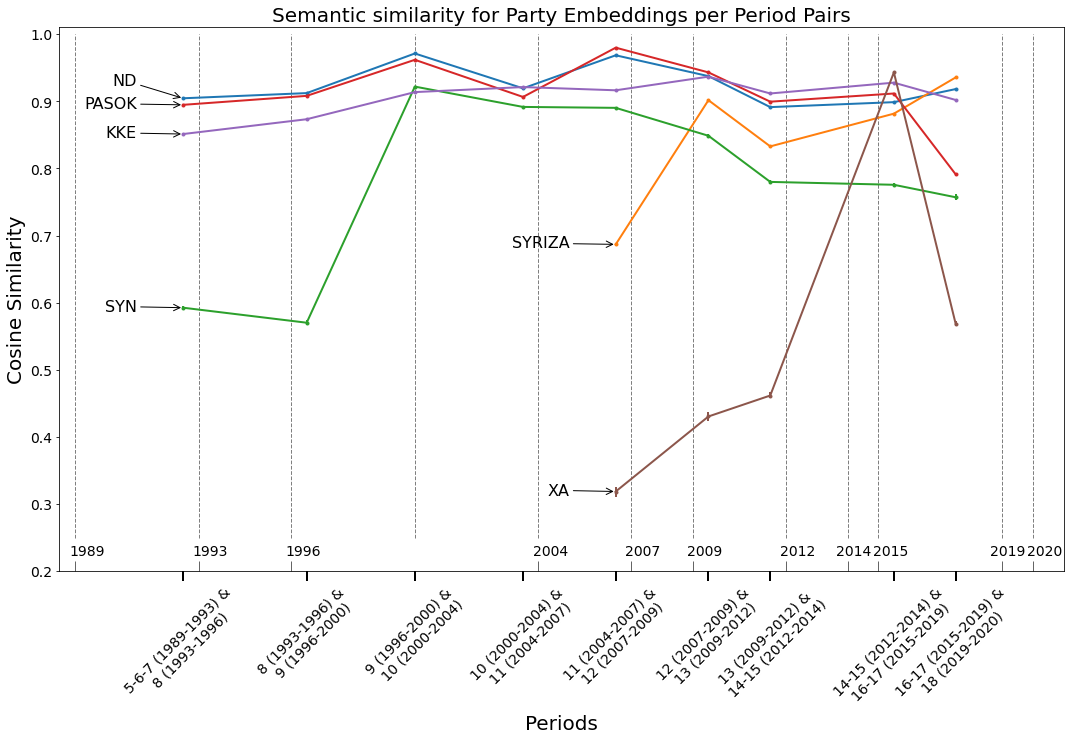

In [12]:
fig = plt.figure(figsize=(18, 10))

parties = {
    '@νδ': 'ND',
    '@συριζα': 'SYRIZA',
    '@συνασπισμος' : 'SYN',
    '@πασοκ': 'PASOK',
    '@κκε': 'KKE',
    '@χα': 'XA'
}

xytext_offsets = {
    '@νδ': (-1.5, 0.02),
    '@συριζα': (-1.5, -0.005),
    '@συνασπισμος' : (-1.5, -0.005),
    '@πασοκ': (-1.5, -0.005),
    '@κκε': (-1.5, -0.005),
    '@χα': (-1.5, -0.005)
}

for party in parties.keys():
    party_data_df = average_similarity_df[average_similarity_df['word'] == party]
    yerr = [
        party_data_df['yerr_low'],
        party_data_df['yerr_high']
    ]
    
    average_similarity = party_data_df[('semantic_similarity', 'mean')]
    x = party_data_df['period_middle'].iloc[0]
    y = average_similarity.iloc[0]
    plt.errorbar(x=party_data_df['period_middle'], 
                 y=average_similarity, 
                 yerr=yerr, 
                 label=party, 
                 linewidth=2, markersize=3, fmt='-o')
    plt.annotate(parties[party], 
                 xy=(x, y), 
                 xytext=(x+xytext_offsets[party][0], y+xytext_offsets[party][1]),
                 fontsize=16,
                 ha='right',
                 arrowprops=dict(arrowstyle='->'))

plt.xlim((1988.5, 2021))
plt.ylim((0.2, 1.01))

xticks = average_similarity_df['period_middle'].unique()
xtick_labels = [ period_ticklabel(x) for x in sorted(average_similarity_df['period_pair'].unique()) ]
plt.xticks(xticks, xtick_labels, rotation=45, minor=False, fontsize=14)
plt.tick_params(axis='x', direction='out', which='major', length=10, width=2)
plt.yticks(fontsize=14)

xminor_ticks = sorted(list(set(list(average_similarity_df['period_start'].unique())
                        + list(average_similarity_df['period_end'].unique()))))
plt.tick_params(axis='x', direction='in', which='minor', length=10)
_ = plt.gca().set_xticks(xminor_ticks, minor=True)
_ = plt.gca().set_xticklabels(xminor_ticks, minor=True, fontsize=14)

dx = 6/72
dy = 30/72
pos_offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
neg_offset = matplotlib.transforms.ScaledTranslation(2*dx, dy, fig.dpi_scale_trans)
# apply offset transform to all minor x ticklabels.
for il, label in enumerate(plt.gca().xaxis.get_minorticklabels()):
    if il == 7 or il == 9:
        label.set_transform(label.get_transform() + pos_offset)
    else:
        label.set_transform(label.get_transform() + neg_offset)


plt.vlines(x=xminor_ticks, ymin=0.25, ymax=1, colors='gray', ls='--', lw=1, label='vline_multiple - full height')
plt.ylabel('Cosine Similarity', fontsize=20)
plt.xlabel('Periods', fontsize=20)
_ = plt.title('Semantic similarity for Party Embeddings per Period Pairs', fontsize=20)